In [7]:
import sys
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import pandas as pd

import random
random.seed(42)

import nltk
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kennyhuynh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kennyhuynh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kennyhuynh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy score for Hard Margin SVM: 0.969524
Recall score for Hard Margin SVM: 0.976730
Precision score for Hard Margin SVM: 0.963400
F-1 score for Hard Margin SVM: 0.970019
Accuracy score for Soft Margin SVM: 0.667302
Recall score for Soft Margin SVM: 1.000000
Precision score for Soft Margin SVM: 0.602729
F-1 score for Soft Margin SVM: 0.752129


/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/

Grid search results for SVM:  {'mean_fit_time': array([0.00602517, 0.01043296, 0.00960441, 0.01139221, 0.03449645,
       0.080617  , 0.08840084]), 'std_fit_time': array([0.00039322, 0.00068588, 0.00107393, 0.00034446, 0.00135169,
       0.00309698, 0.0018605 ]), 'mean_score_time': array([0.00059075, 0.00068922, 0.00065165, 0.0004972 , 0.00057683,
       0.00074782, 0.00082173]), 'std_score_time': array([2.30756740e-04, 1.11270377e-04, 1.11804577e-04, 1.51530716e-05,
       2.74289566e-05, 1.00102260e-04, 1.16972111e-04]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.94825766, 0.97148891, 0.97571278, 0.97465681, 0.97676874,
       0.97676874, 0.95776135]), 'split1_test_score': array([0.93664203, 0.96726505, 0.97360084, 0.9

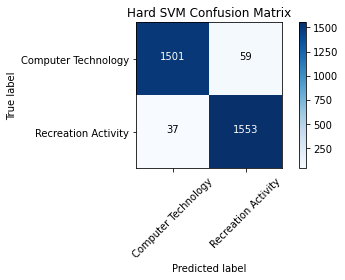

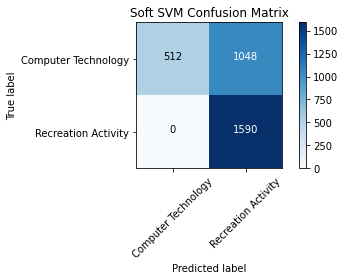

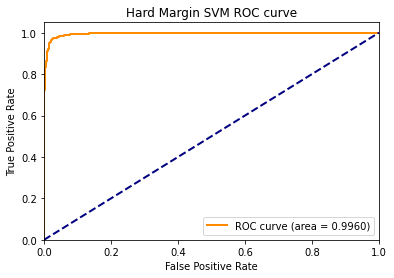

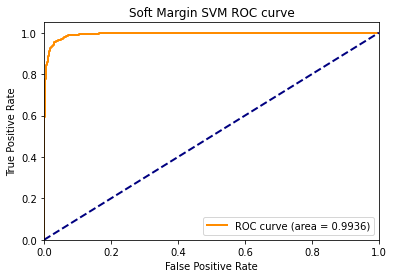

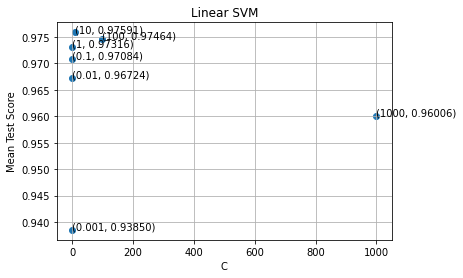

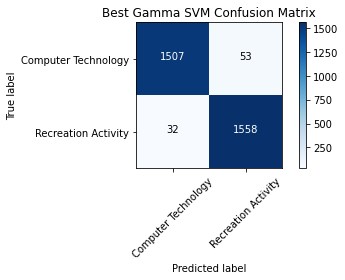

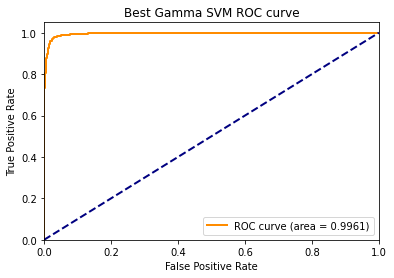

In [8]:
# Question 4:

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import itertools
from sklearn.model_selection import GridSearchCV

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def print_classifier_metrics(y_test,y_pred,name="",average='binary'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(y_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(y_test,y_pred,average=average)))
    print("Precision score for %s: %f" % (name,precision_score(y_test,y_pred,average=average)))
    print("F-1 score for %s: %f" % (name,f1_score(y_test,y_pred,average=average)))

def plot_roc_curve(y_test,decision_function,name=""):
    fpr = dict();tpr = dict();roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_test, decision_function)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
    plt.title('%s ROC curve' % name);plt.legend(loc="lower right")

hardSVM = LinearSVC(C=1000,random_state=42)
softSVM = LinearSVC(C=0.0001,random_state=42)

y_train = [int(i/4) for i in train_dataset.target] 
y_test = [int(i/4) for i in test_dataset.target] 

y_pred_hardSVM = hardSVM.fit(X_train_LSI,y_train).predict(X_test_LSI) 
y_pred_softSVM = softSVM.fit(X_train_LSI,y_train).predict(X_test_LSI) 

print_classifier_metrics(y_test,y_pred_hardSVM,name="Hard Margin SVM")
print_classifier_metrics(y_test,y_pred_softSVM,name="Soft Margin SVM")

class_names = ['Computer Technology', 'Recreation Activity']
hardSVM_cm = confusion_matrix(y_test,y_pred_hardSVM) 
plt.figure(); plot_confusion_matrix(hardSVM_cm, classes=class_names, title='Hard SVM Confusion Matrix') 
softSVM_cm = confusion_matrix(y_test,y_pred_softSVM) 
plt.figure(); plot_confusion_matrix(softSVM_cm, classes=class_names, title='Soft SVM Confusion Matrix')

plot_roc_curve(y_test,hardSVM.decision_function(X_test_LSI),name="Hard Margin SVM")  
plot_roc_curve(y_test,softSVM.decision_function(X_test_LSI),name="Soft Margin SVM")  

svc = LinearSVC(random_state=42) 
params = {'C':[0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(svc,params,cv=5,scoring='accuracy') 
clf.fit(X_train_LSI,y_train)

x = [0.001,0.01,0.1,1,10,100,1000]
y = clf.cv_results_['mean_test_score']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x,y)
for xy in zip(x, y):                                       
    ax.annotate('(%s, %.5f)' % xy, xy=xy, textcoords='data')
plt.xlabel('C'); plt.ylabel('Mean Test Score'); plt.title("Linear SVM")
plt.grid()

y_pred_cv = clf.best_estimator_.predict(X_test_LSI)
best_svm_gamma = clf.best_estimator_.C

print("Grid search results for SVM: ", clf.cv_results_)
print("Best estimator for SVM: ", clf.best_estimator_)
print("Best parameters for SVM: ", clf.best_params_)
print("Best score for SVM: ", clf.best_score_)
print("Best Gamma for SVM: ", best_svm_gamma)
print_classifier_metrics(y_test,y_pred_cv,name="Best Gamma SVM")

cv_cm = confusion_matrix(y_test,y_pred_cv) 
plt.figure(); plot_confusion_matrix(cv_cm, classes=class_names, title='Best Gamma SVM Confusion Matrix')

plot_roc_curve(y_test,clf.best_estimator_.decision_function(X_test_LSI),name="Best Gamma SVM")  

Coefficients learned by logistic regression without regularization:  [[-4.83050055e+00  1.25219074e+02 -2.01925026e+01  9.50532586e+01
   1.14001365e+01 -2.26412785e+01  1.97536240e+00 -8.96910375e-01
   2.76334014e+01  7.43901413e+00  3.41163696e+01 -7.42255083e+00
  -1.30090735e+01  1.10791718e+01  5.02757911e+00 -1.35359430e+01
  -1.01348696e+01  1.05194793e+01  1.66436293e+01 -1.31040535e+01
   5.46353083e+00  5.89496841e+00 -1.05324998e+01  3.44791584e+00
  -1.73782836e+01  8.25596233e+00 -2.45196543e+00 -9.01004099e-01
   2.44836124e+01  3.16992196e-01 -1.42938529e-02  1.43240735e+01
   1.23814760e+01  2.97679774e-01  8.98256229e+00  1.14147346e+00
   2.36154101e+00 -1.41383273e+01  5.96684116e+00  4.63850045e+00
   1.01005767e+01  1.84366937e+01  5.52369602e+00  3.74901353e+00
   6.81264438e+00  7.12985196e+00  2.94969367e+00 -5.08203585e+00
  -1.11409248e+01 -1.09662923e+01]]
Accuracy score for Logistic Regression without regularization: 0.970794
Recall score for Logistic Regre

/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

Grid search results for logistic regression with l-2 regularization:  {'mean_fit_time': array([0.00446348, 0.00485015, 0.00538626, 0.01270142, 0.01584358,
       0.02391119, 0.03267436]), 'std_fit_time': array([0.00024057, 0.00017879, 0.00044133, 0.00263384, 0.00115935,
       0.00490777, 0.0074846 ]), 'mean_score_time': array([0.00056739, 0.00060821, 0.00052686, 0.00057082, 0.00054121,
       0.00053716, 0.00064616]), 'std_score_time': array([5.18222183e-05, 1.06132640e-04, 9.99016522e-06, 5.44259852e-05,
       1.65366961e-05, 1.21354823e-05, 1.13818483e-04]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.51742344, 0.94825766, 0.97148891, 0.97465681, 0.97465681,
       0.97782471, 0.97360084]), 'split1_test_score': array(

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

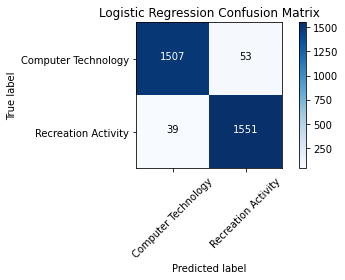

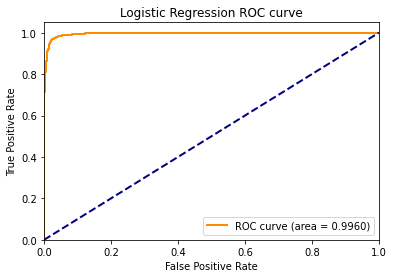

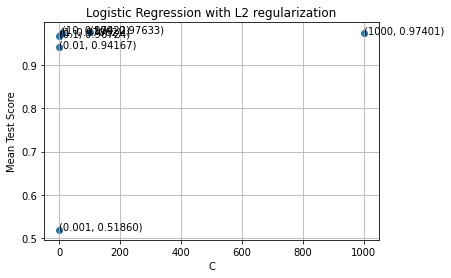

In [9]:
# Question 5:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10**10,random_state=42) 
y_pred_lr = lr.fit(X_train_LSI,y_train).predict(X_test_LSI)
print("Coefficients learned by logistic regression without regularization: ", lr.coef_)
print_classifier_metrics(y_test,y_pred_lr,name="Logistic Regression without regularization")
lr_cm = confusion_matrix(y_test,y_pred_lr) 
plt.figure(); plot_confusion_matrix(lr_cm, classes=class_names, title='Logistic Regression Confusion Matrix')
plot_roc_curve(y_test,lr.decision_function(X_test_LSI),name="Logistic Regression") 
lr_l2 = LogisticRegression(random_state=42) 
clf_l2 = GridSearchCV(lr_l2,params,cv=5,scoring='accuracy') 
y_pred_l2 = clf_l2.fit(X_train_LSI,y_train).best_estimator_.predict(X_test_LSI)
best_l2_gamma = clf_l2.best_estimator_.C

x = [0.001,0.01,0.1,1,10,100,1000]
y = clf_l2.cv_results_['mean_test_score']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x,y)
for xy in zip(x, y):                                       
    ax.annotate('(%s, %.5f)' % xy, xy=xy, textcoords='data')
plt.xlabel('C'); plt.ylabel('Mean Test Score'); plt.title("Logistic Regression with L2 regularization")
plt.grid()


print("Grid search results for logistic regression with l-2 regularization: ", clf_l2.cv_results_)
print("Best estimator for logistic regression with l-2 regularization: ", clf_l2.best_estimator_)
print("Best parameters for logistic regression with l-2 regularization: ", clf_l2.best_params_)
print("Best score for logistic regression with l-2 regularization: ", clf_l2.best_score_)
print("Best Gamma for logistic regression with l-2 regularization: ", best_l2_gamma)
print("Coefficients learned by logistic regression with l-2 regularization: ", clf_l2.best_estimator_.coef_)
print_classifier_metrics(y_test,y_pred_l2,name="Logistic Regression with l-2 regularization")


lr_l1 = LogisticRegression(penalty='l1',random_state=42) 
clf_l1 = GridSearchCV(lr_l1,params,cv=5,scoring='accuracy') 
y_pred_l1 = clf_l1.fit(X_train_LSI,y_train).best_estimator_.predict(X_test_LSI)
best_l1_gamma = clf_l1.best_estimator_.C

x = [0.001,0.01,0.1,1,10,100,1000]
y = clf_l1.cv_results_['mean_test_score']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x,y)
for xy in zip(x, y):                                       
    ax.annotate('(%s, %.5f)' % xy, xy=xy, textcoords='data')
plt.xlabel('C'); plt.ylabel('Mean Test Score'); plt.title("Logistic Regression with L1 regularization")
plt.grid()

print("Grid search results for logistic regression with l-1 regularization: ", clf_l1.cv_results_)
print("Best estimator for logistic regression with l-1 regularization: ", clf_l1.best_estimator_)
print("Best parameters for logistic regression with l-1 regularization: ", clf_l1.best_params_)
print("Best score for logistic regression with l-1 regularization: ", clf_l1.best_score_)
print("Best Gamma for logistic regression with l-1 regularization: ", best_l1_gamma)
print("Coefficients learned by logistic regression with l-1 regularization: ", clf_l1.best_estimator_.coef_)
print_classifier_metrics(y_test,y_pred_l1,name="Logistic Regression with l-1 regularization")